In [1]:
#TASK 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           213 non-null    float64
 3   ssc_b           213 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           208 non-null    object 
 7   degree_p        208 non-null    float64
 8   degree_t        208 non-null    object 
 9   workex          208 non-null    object 
 10  etest_p         213 non-null    float64
 11  specialisation  213 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           213 non-null    float64
 3   ssc_b           213 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           208 non-null    object 
 7   degree_p        208 non-null    float64
 8   degree_t        208 non-null    object 
 9   workex          208 non-null    object 
 10  etest_p         213 non-null    float64
 11  specialisation  213 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,213.000000,215.000000,208.000000,213.000000,215.000000,148.000000
mean,108.000000,67.409531,66.333163,66.269663,72.110892,62.278186,288655.405405
std,62.209324,10.815114,10.897509,7.176998,13.309323,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,61.000000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,76.000000,73.000000,72.000000,84.000000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,85.000000,98.000000,77.890000,940000.000000


In [7]:
df['salary'].value_counts()

300000.0    22
250000.0    18
240000.0    15
260000.0     7
360000.0     6
200000.0     6
265000.0     6
220000.0     5
275000.0     5
210000.0     4
400000.0     4
270000.0     4
216000.0     3
350000.0     3
500000.0     3
252000.0     2
236000.0     2
230000.0     2
280000.0     2
218000.0     2
204000.0     2
276000.0     2
255000.0     1
285000.0     1
340000.0     1
690000.0     1
233000.0     1
290000.0     1
650000.0     1
264000.0     1
225000.0     1
940000.0     1
393000.0     1
380000.0     1
420000.0     1
425000.0     1
336000.0     1
231000.0     1
268000.0     1
450000.0     1
287000.0     1
411000.0     1
320000.0     1
278000.0     1
295000.0     1
Name: salary, dtype: int64

In [8]:
target = 'salary'
features = df.columns.drop(target)
print('Target variable: ', target)
print('Feature variables: ', list(features))

Target variable:  salary
Feature variables:  ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status']


In [9]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              2
ssc_b              2
hsc_p              0
hsc_b              0
hsc_s              7
degree_p           7
degree_t           7
workex             7
etest_p            2
specialisation     2
mba_p              0
status             0
salary            67
dtype: int64

In [10]:
df['salary'] = df['salary'].fillna(df['salary'].median())
df['ssc_p'] = df['ssc_p'].fillna(df['ssc_p'].median())
df['degree_p'] = df['degree_p'].fillna(df['degree_p'].median())
df['etest_p'] = df['etest_p'].fillna(df['etest_p'].median())

In [11]:
df['ssc_b'].fillna(df['ssc_b'].mode()[0], inplace=True)
df['hsc_s'].fillna(df['hsc_s'].mode()[0], inplace=True)
df['degree_t'].fillna(df['degree_t'].mode()[0], inplace=True)
df['workex'].fillna(df['workex'].mode()[0], inplace=True)
df['specialisation'].fillna(df['specialisation'].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [13]:
#Instead of dropping values, I replaced numerical columns with median and categorical columns with mode.

In [15]:
df_encoded = pd.get_dummies(df, columns=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status'], drop_first=True)
df_encoded

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,1,0,1,0,1,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,265000.0,1,0,0,0,1,0,1,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,1,1,1,1,0,0,0,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,1,1,1,0,1,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,1,1,1,1,0,0,0,1,0,1
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,0,1,1,1,0,0,0,0,1,1


In [16]:
Q1 = df_encoded['salary'].quantile(0.25)
Q3 = df_encoded['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_encoded['salary'] = np.where(df_encoded['salary'] < lower_limit, lower_limit, np.where(df_encoded['salary'] > upper_limit, upper_limit, df_encoded['salary']))


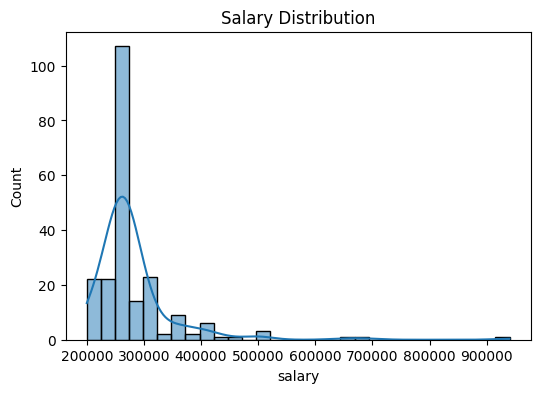

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['salary'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.show()

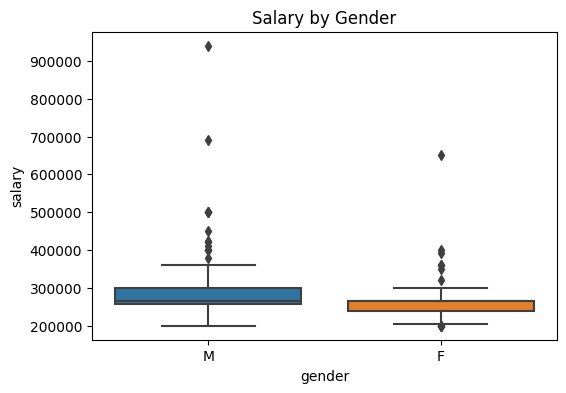

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='salary', data=df)
plt.title("Salary by Gender")
plt.show()

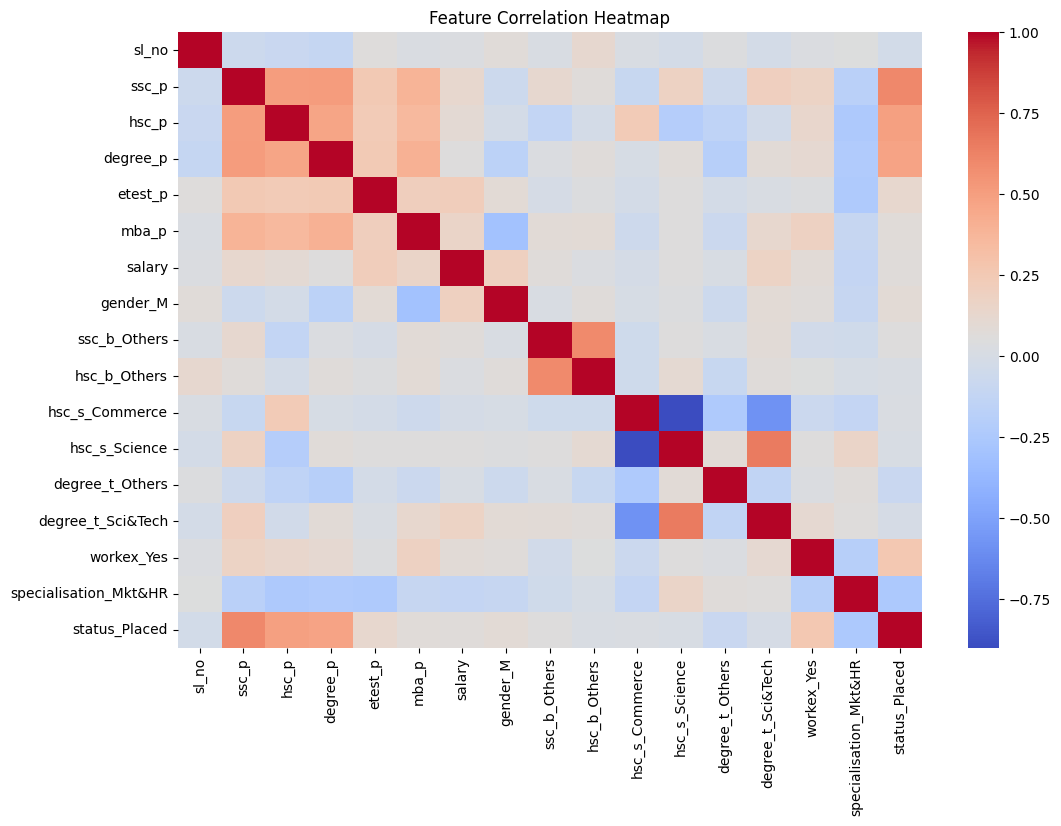

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
x=df_encoded.drop(columns=['salary'])
y=df['salary']

In [26]:
x,y

(     sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p  gender_M  ssc_b_Others  \
 0        1  67.00  91.00     58.00     55.0  58.80         1             1   
 1        2  79.33  78.33     77.48     86.5  66.28         1             0   
 2        3  65.00  68.00     64.00     75.0  57.80         1             0   
 3        4  56.00  52.00     52.00     66.0  59.43         1             0   
 4        5  85.80  73.60     73.30     96.8  55.50         1             0   
 ..     ...    ...    ...       ...      ...    ...       ...           ...   
 210    211  80.60  82.00     77.60     91.0  74.49         1             1   
 211    212  58.00  60.00     72.00     74.0  53.62         1             1   
 212    213  67.00  67.00     73.00     59.0  69.72         1             1   
 213    214  74.00  66.00     58.00     70.0  60.23         0             1   
 214    215  62.00  58.00     53.00     89.0  60.22         1             0   
 
      hsc_b_Others  hsc_s_Commerce  hsc_s_Science 

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_test

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
200,201,69.00,60.00,66.00,87.55,52.81,1,1,1,1,0,0,0,0,0,1
212,213,67.00,67.00,73.00,59.00,69.72,1,1,1,1,0,0,0,1,0,1
138,139,82.00,64.00,73.00,96.00,71.77,0,1,1,0,1,0,1,1,0,1
176,177,59.00,60.00,56.00,55.00,57.90,0,0,1,1,0,0,0,0,1,1
15,16,65.00,75.00,69.00,72.00,64.66,0,0,0,1,0,0,0,1,0,1
111,112,51.00,54.00,61.00,60.00,60.64,1,1,1,0,1,0,1,0,1,0
168,169,48.00,51.00,58.00,60.00,58.79,0,0,0,1,0,0,0,1,1,0
73,74,64.60,83.83,71.72,86.00,59.75,1,0,1,1,0,0,0,0,0,1
204,205,74.00,73.00,73.00,71.00,67.69,0,1,1,1,0,0,0,1,0,1
139,140,77.00,70.00,59.00,58.00,54.43,1,0,0,1,0,0,0,1,0,1


In [29]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.17809769, -1.41643372, -0.35425688, ..., -0.68562779,
         1.13724814, -1.4585173 ],
       [-0.32168896,  0.2529213 , -0.26697149, ...,  1.4585173 ,
        -0.87931557,  0.68562779],
       [-0.14618852,  0.53114714,  1.04230932, ...,  1.4585173 ,
        -0.87931557,  0.68562779],
       ...,
       [-0.19405228, -0.6531675 ,  0.25674083, ..., -0.68562779,
        -0.87931557,  0.68562779],
       [ 1.19399663,  0.97630848, -0.17968611, ..., -0.68562779,
         1.13724814, -1.4585173 ],
       [-0.03450643,  0.90211492, -0.44154227, ...,  1.4585173 ,
        -0.87931557,  0.68562779]])

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(x_test)
y_pred

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([1610392.67341167, 1494257.01212311, 1705587.10221583,
       1355080.9292452 , 1380911.30131526, 1452784.65225625,
       1561417.14834234, 1645651.54446036, 1537959.65884361,
       1030697.84567273, 1309781.81224459,  950220.8851252 ,
       1559842.24602577, 1019023.75035623, 1112457.21527197,
       1793502.75102727, 1287738.23441884, 1304738.43552486,
       2014826.85537348, 1004729.59273846, 1451468.93011415,
        920989.10352669, 1446654.86893127, 1667615.58825553,
       1041241.05409504, 1095763.02367033, 2240435.84120819,
       1178503.84582517,  966847.78970945, 1184951.38780056,
       1718121.86570636, 1280572.84960962, 1241067.32000697,
       1487414.89295611, 1346909.41928185, 1576971.04851784,
       1515307.40382322, 1103572.56369689, 1818059.97046277,
       1306187.08110439, 1159653.87207686, 1426272.45116428,
       1488680.02997291])

In [40]:
pd.DataFrame({'y_test':y_test,'y_predict':y_pred, 'MAE':y_test-y_pred})

,y_test,y_predict,MAE
200,300000.0,1.610393e+06,-1.310393e+06
212,295000.0,1.494257e+06,-1.199257e+06
138,250000.0,1.705587e+06,-1.455587e+06
176,220000.0,1.355081e+06,-1.135081e+06
15,200000.0,1.380911e+06,-1.180911e+06
111,265000.0,1.452785e+06,-1.187785e+06
168,265000.0,1.561417e+06,-1.296417e+06
73,218000.0,1.645652e+06,-1.427652e+06
204,210000.0,1.537960e+06,-1.327960e+06
139,220000.0,1.030698e+06,-8.106978e+05


In [35]:
lr.coef_

array([  1622.04224827, -17106.46149611,   4743.6949321 ,  -4956.17047822,
        15391.71861986,  15755.86490778,   4754.1720887 ,   4191.68770019,
        -2787.64190262,  24777.48975778,  14533.98487398,   8691.0234002 ,
        15393.78867911,   4676.12856925,  -7260.1014668 ,  14698.00736766])

In [36]:
lr.intercept_

281947.67441860464

In [37]:
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 Score: ",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE: 1329011553029.582
R2 Score:  -223.89270914228487
RMSE: 1152827.6337031403


In [ ]:
#TASK 2

#Overfitting = Overfitting happens when a model learns too much from the training data and it performs well on training data as well but poorly on not seen data.

#Underfitting = Underfitting happens when a model is too simple to capture the underlying patterns in the data.

#Bias = Bias meansto systematic errors in a model that lead to unfair or skewed outcomes, often favoring certain groups over others.